In [10]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_pickle('../data/regresion_lineal/supermarket_3.pkl')
df.head()

,city,customer_type,gender,product_line,unit_price,quantity,date,time,payment,rating,month,shift,total_boxcox
0,Yangon,Member,Female,Health and beauty,0.431869,7,2019-01-05,13:08,Ewallet,0.700000,January,Morning,17.284419
1,Naypyitaw,Normal,Female,Electronic accessories,-0.886596,5,2019-03-08,10:29,Cash,0.866667,March,Morning,8.608895
2,Yangon,Normal,Male,Home and lifestyle,-0.197514,7,2019-03-03,13:23,Credit card,0.133333,March,Morning,14.677443
3,Yangon,Member,Male,Health and beauty,0.066356,8,2019-01-27,20:33,Ewallet,0.466667,January,Afternoon,16.621158
4,Yangon,Normal,Male,Sports and travel,0.689747,7,2019-02-08,10:37,Ewallet,-0.566667,February,Morning,18.144916


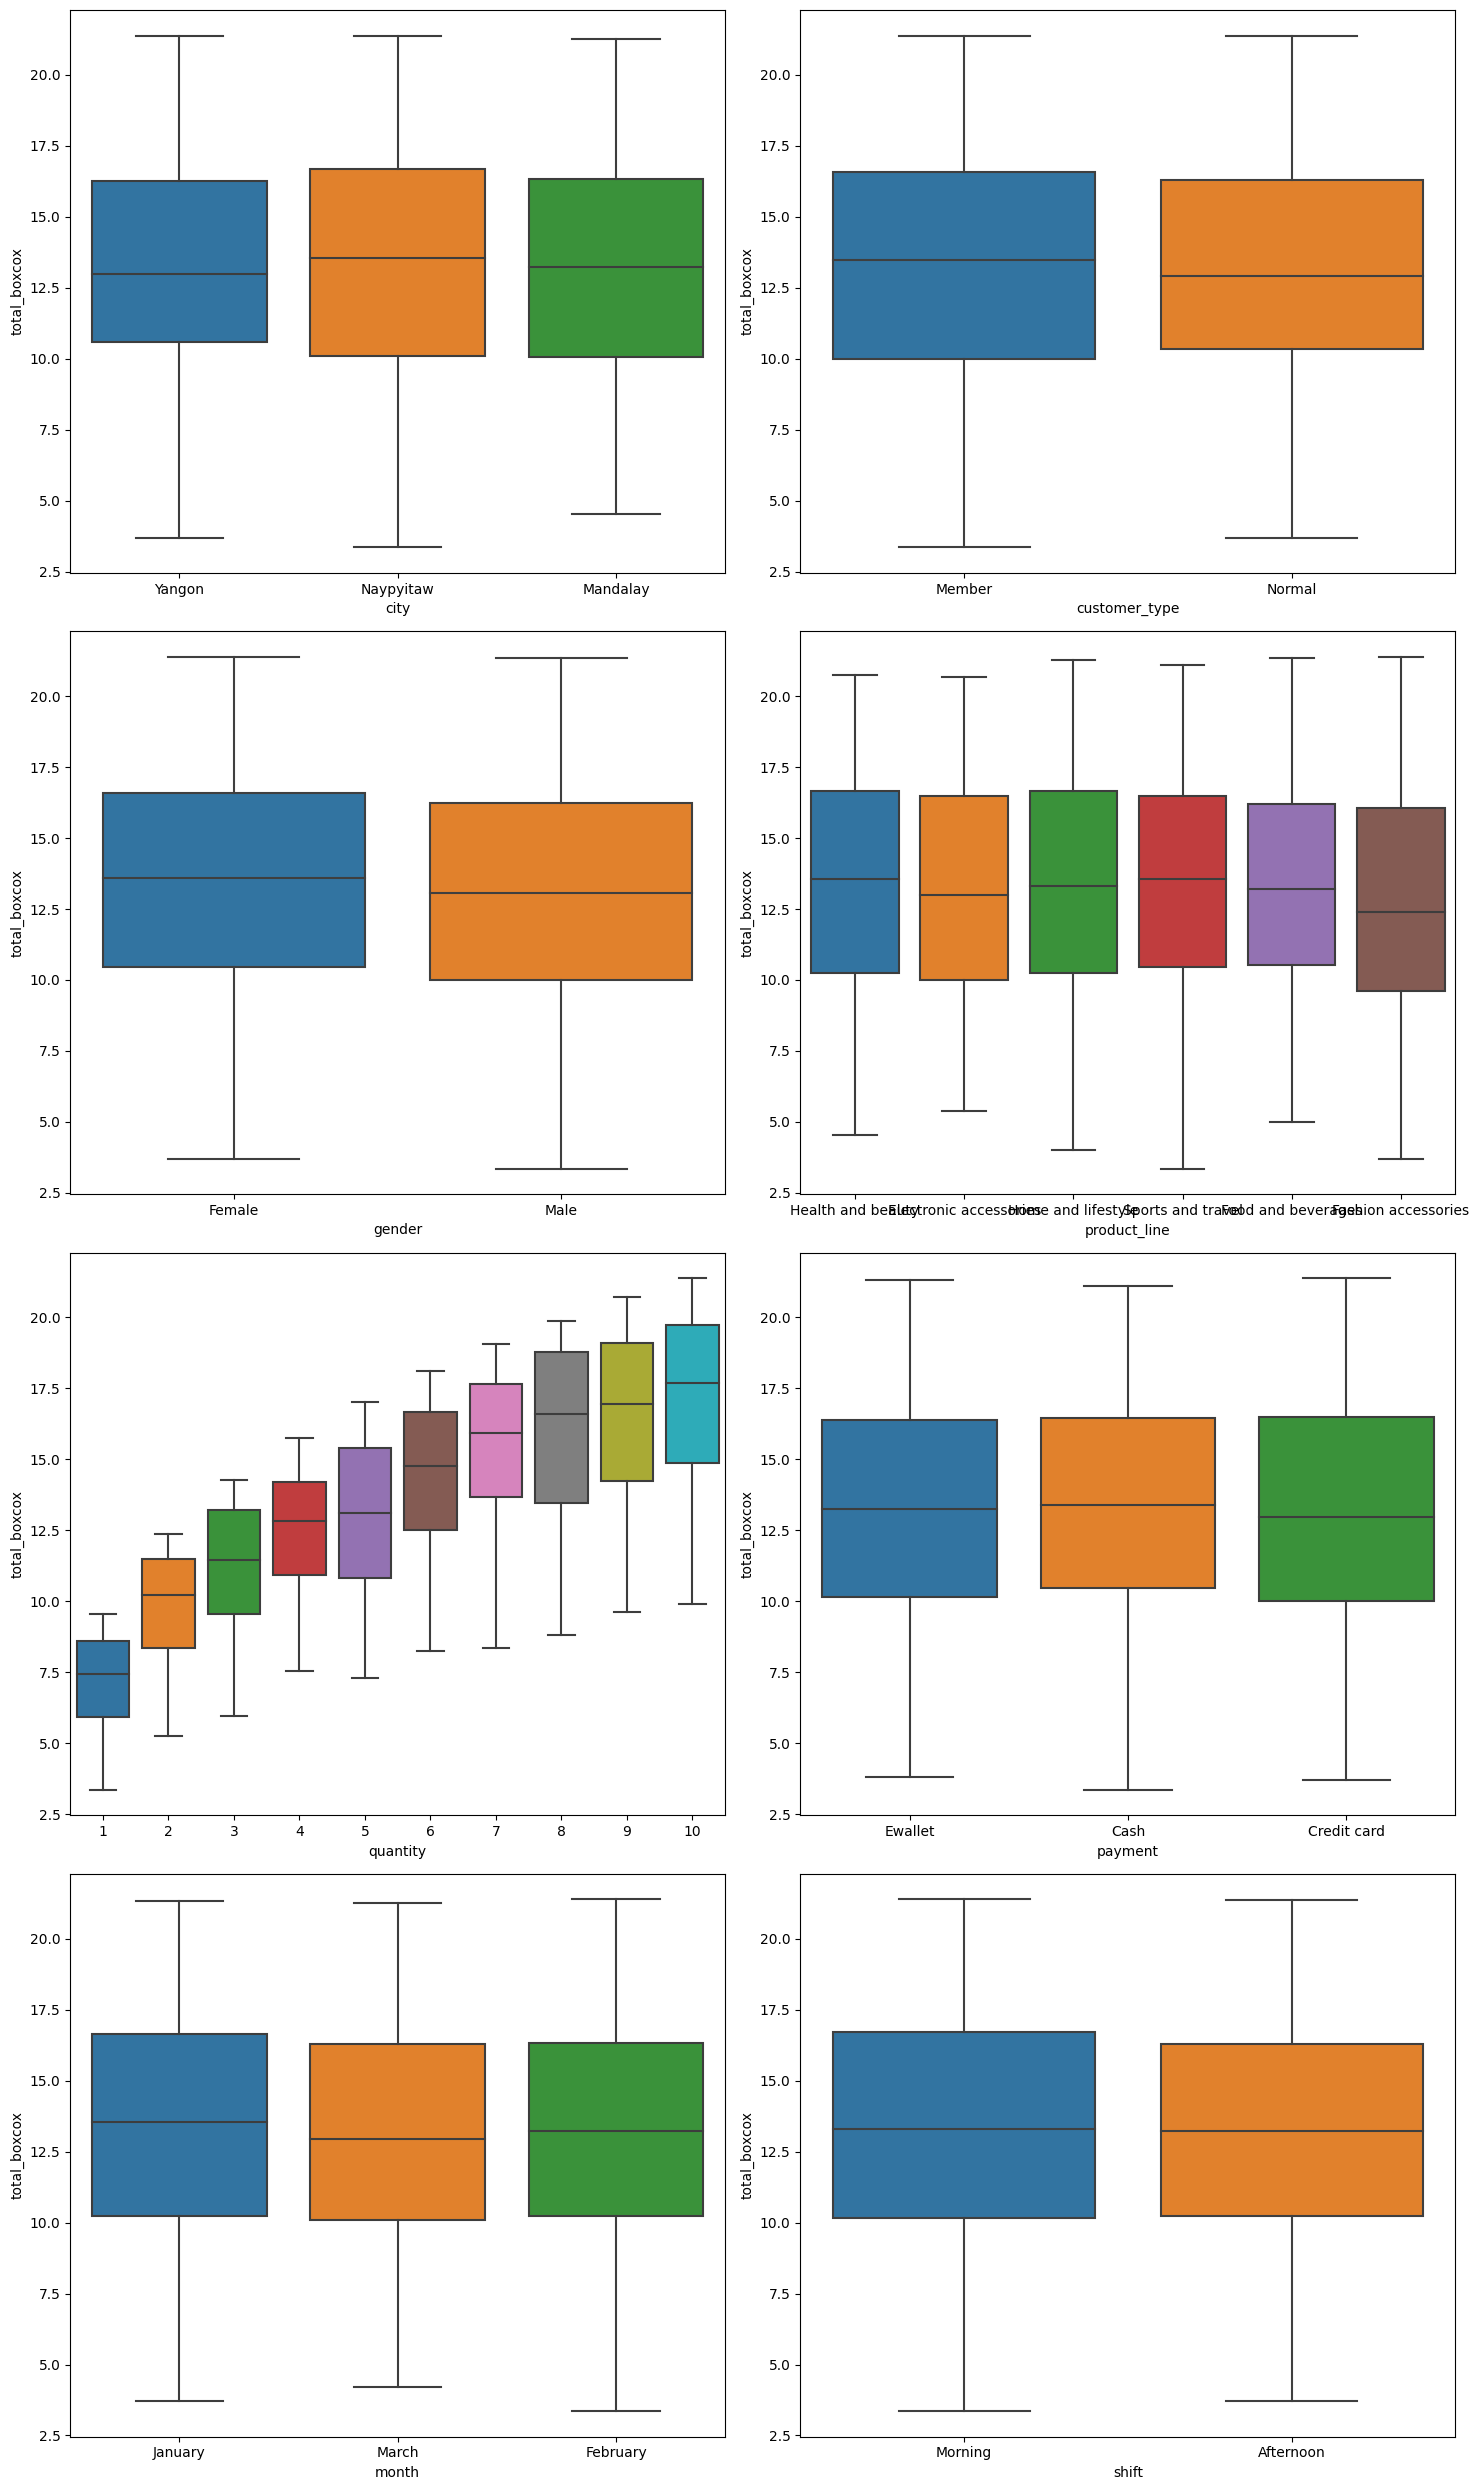

In [12]:
# sacamos boxplots para ver si las variables tienen orden:

fig, axes = plt.subplots(4, 2, figsize=(15, 25))
axes = axes.flat

lista_super = ["city", "customer_type", "gender", "product_line", "quantity", "payment", "month", "shift"]

for indice, elemento in enumerate(lista_super):
    sns.boxplot(x = elemento, y = "total_boxcox", data = df, ax=axes[indice])

plt.tight_layout()
plt.show()

CONCLUSIÓN:

Ninguna de nuestras categóricas tiene orden a excepción de quantity.

In [13]:
# OneHotEncoder para las variables que no tienen orden:

#Tenemos varias categóricas sin orden, por lo que para pasar el método creamos un for.
#Para ello creamos una lista con las categóricas y un df vacío para ir añadiendo los resultados de cada columna.

lista_sin_orden = ["city", "customer_type", "gender", "product_line", "payment", "month", "shift"]
df_sin_orden = pd.DataFrame()

for col in lista_sin_orden:
    oh = OneHotEncoder() #instanciamos el método.
    transformados = oh.fit_transform(df[[col]]) #indicamos que aprenda y ejecute el método.
    oh_df = pd.DataFrame(transformados.toarray()) #transforma el resultado a df.
    oh_df.columns = oh.get_feature_names_out() #cambia el nombre de las columnas a uno más descriptivo.
    df_sin_orden = pd.concat([df_sin_orden, oh_df], axis = 1) #concatena cada df resultante al df vacío.

In [14]:
df_final = pd.concat([df, df_sin_orden],axis=1)
df_final.head(1)

,city,customer_type,gender,product_line,unit_price,quantity,date,time,payment,rating,...,product_line_Home and lifestyle,product_line_Sports and travel,payment_Cash,payment_Credit card,payment_Ewallet,month_February,month_January,month_March,shift_Afternoon,shift_Morning
0,Yangon,Member,Female,Health and beauty,0.431869,7,2019-01-05,13:08,Ewallet,0.7,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [15]:
#No tiene sentido codificar quantity ya que se compone de números. Como éstos están categorizados, creamos una columna nueva con los mismo valores pero numérica.

df_final["quantity_num"] = df_final["quantity"].astype("int64")

In [16]:
df_final.to_pickle("../data/regresion_lineal/supermarket_4.pkl")